> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
1.1 Context
    A person makes a doctor appointment, receives all the instructions and no-show.<br>
    Link dataset: https://www.kaggle.com/datasets/joniarroba/noshowappointments<br>
### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.<br>
01 - PatientId: Identification of a patient<br>
02 - AppointmentID: Identification of each appointment<br>
03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.<br>
04 - DataMarcacaoConsulta:The day of the actuall appointment, when they have to visit the doctor.<br>
05 - DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.<br>
06 - Age: How old is the patient.<br>
07 - Neighbourhood: Where the appointment takes place.<br>
08 - Scholarship: True of Fal<br>
09 - Hipertension: True or False<br>
10 - Diabetes: True or False<br>
11 - Alcoholism: True or False<br>
12 - Handcap: True or False<br>
13 - SMS_received: 1 or more messages sent to the patient.<br>
14 - No-show: True or False.<br>

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.<br>
1.Which column has an outlier?<br>
2.Does the data set have any missing cells? Are there any duplicate rows?<br>
3. Which columns need to optimize the size of the data type?<br>
> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. <br>
1.Does age affect participation rate?<br>
2.What is the ratio of participants?<br>
3.Does gender affect participation?<br>
4.Does neighborhood influence participation?<br>
5.Percentage of patients admitted as no-shows by number of waiting days?<br>

In [47]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [48]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [49]:
# Load your data and print out a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [50]:
# Show the size of my dataframe
df.shape

(110527, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [52]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# 1.Which column has an outlier?

In [53]:
# Check for outliers in the Age column
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [54]:
# Delete rows with outliers of age < 0
df.drop(df[df['Age']<0].index, inplace=True)

# 2.Does the data set have any missing cells? Are there any duplicate rows?

In [55]:
# Check the data types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [56]:
# Count the number of missing values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [57]:
# Check for any missing values in the entire dataset
df.isnull().values.any()

False

In [58]:
# Check unique values
df.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [59]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# 3. Which columns need to optimize the size of the data type?

In [60]:
# Convert PatientId   from float64 to int64
df['PatientId'] = df['PatientId'].astype('int64')

In [61]:
# Convert AppointmentID from int64 to int32
df['AppointmentID'] = df['AppointmentID'].astype('int32')

In [62]:
# Convert Age from int64 to int8
df['Age'] = df['Age'].astype('int8')

In [63]:
# Convert Scholarship from int64 to int8
df['Scholarship'] = df['Scholarship'].astype('int8')

In [64]:
# Convert Hipertension from int64 to int8
df['Hipertension'] = df['Hipertension'].astype('int8')

In [65]:
# Convert Diabetes from int64 to int8
df['Diabetes'] = df['Diabetes'].astype('int8')

In [66]:
# Convert Alcoholism from int64 to int8
df['Alcoholism'] = df['Alcoholism'].astype('int8')

In [67]:
# Convert Handcap from int64 to int8
df['Handcap'] = df['Handcap'].astype('int8')

In [68]:
# Convert SMS_received from int64 to int8
df['SMS_received'] = df['SMS_received'].astype('int8')

In [69]:
# Convert Gender from object to category
df['Gender'] = df['Gender'].astype('category')

In [70]:
# Convert No-show from object to category
df['No-show'] = df['No-show'].astype('category')

In [71]:
# Convert Neighbourhood from object to category
df['Neighbourhood'] = df['Neighbourhood'].astype('category')

In [72]:
# Convert ScheduledDay from string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [73]:
# Convert AppointmentDay from string to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

# 1.Does age affect participation rate?

In [74]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [75]:
# Get information rows No-show="No"
NoshowIsNo=df[df['No-show']=="No"]

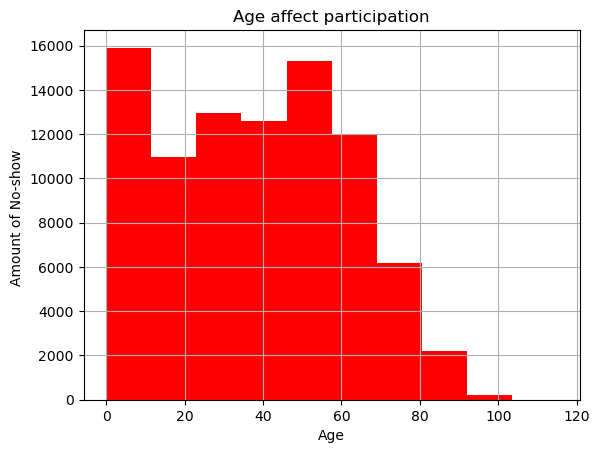

In [76]:
NoshowIsNo["Age"].hist(color="red")
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Amount of No-show ')
plt.title('Age affect participation');

***Looking at the chart we see that the older we are, the lower the absenteeism***

# 2.What is the ratio of participants?

In [77]:
df['No-show'].value_counts() 

No-show
No     88207
Yes    22319
Name: count, dtype: int64

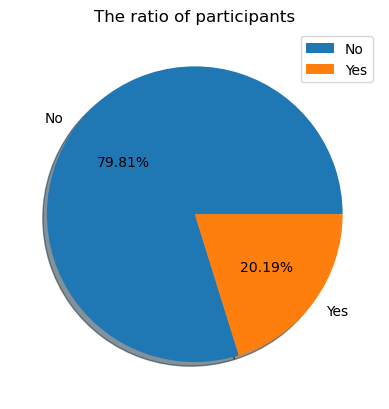

In [78]:
plt.pie(df['No-show'].value_counts(),autopct ="%.2f%%",labels = ["No","Yes"],shadow = True);
plt.legend(["No","Yes"])
plt.title('The ratio of participants');

***Looking at the chart we see that the present rate is higher than the absent rate. About 20% of patients are absent***

# 3.Does gender affect participation?

In [79]:
df['Gender'].value_counts()

Gender
F    71839
M    38687
Name: count, dtype: int64

D:\python\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


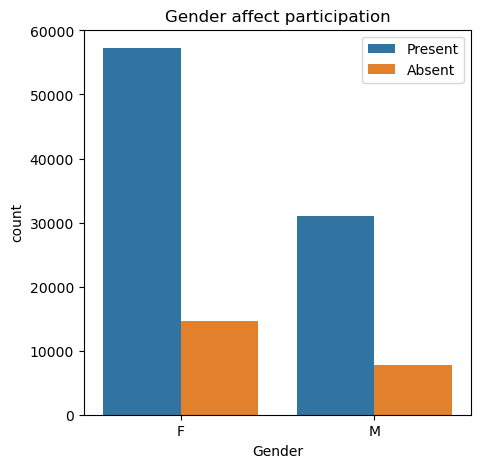

In [80]:
plt.figure(figsize=(5,5))
sb.countplot(x=df['Gender'],hue=df['No-show'])
plt.legend(['Present','Absent']);
plt.title('Gender affect participation');

***The results show that the participation rate of women is higher than that of men, showing that Gender has an influence on participation.***

# 4.Does neighborhood influence participation?

In [81]:
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [82]:
df_Neighbourhood = pd.crosstab(df["Neighbourhood"],df["No-show"])
df_Neighbourhood.sort_values(by='No', ascending=False)

No-show,No,Yes
Neighbourhood,,
JARDIM CAMBURI,6252,1465
MARIA ORTIZ,4586,1219
RESISTÊNCIA,3525,906
JARDIM DA PENHA,3246,631
SANTA MARTHA,2635,496
...,...,...
ILHA DO BOI,32,3
ILHA DO FRADE,8,2
AEROPORTO,7,1


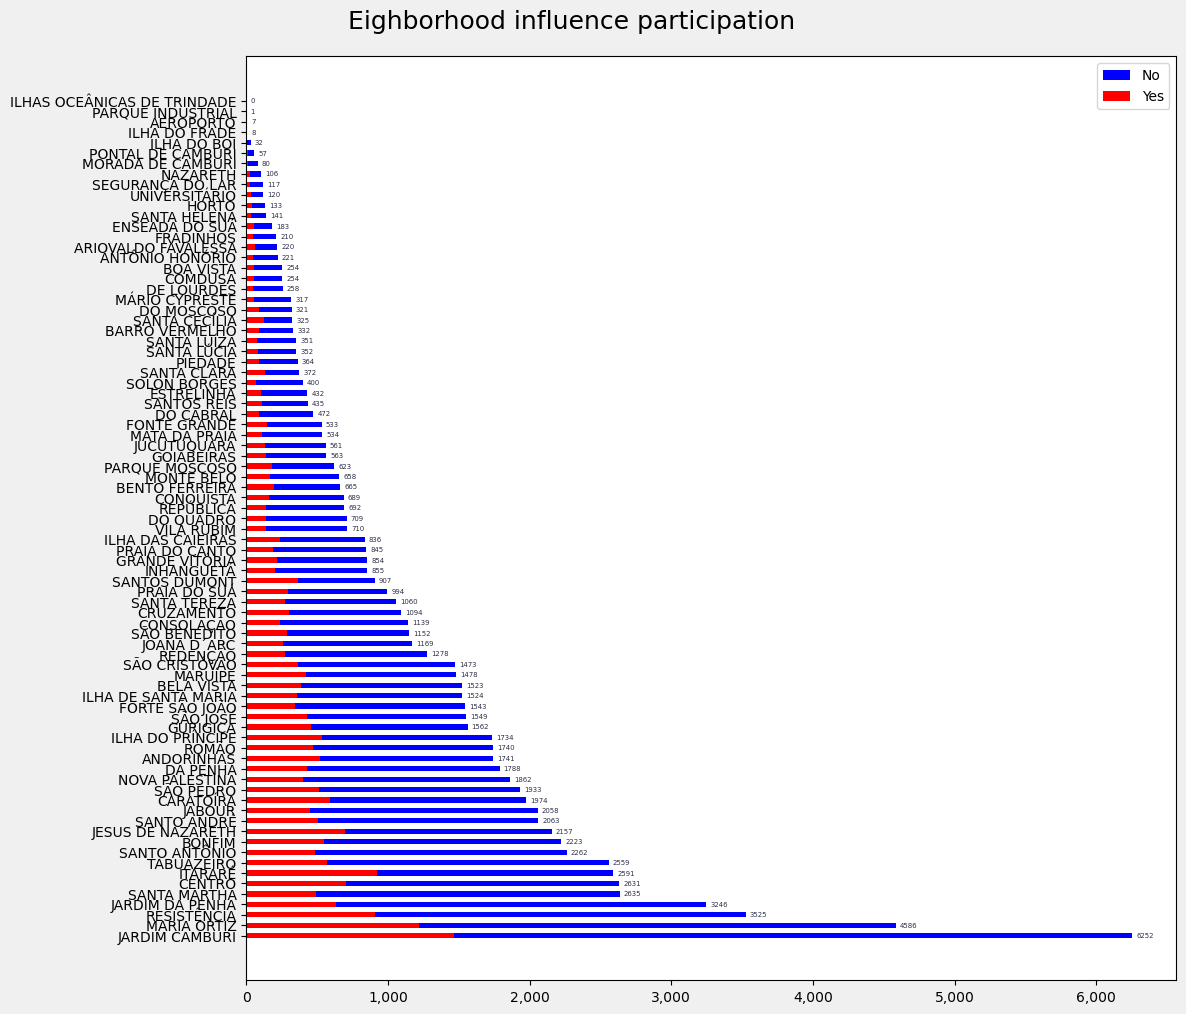

In [83]:
# Draw a figure with a subplot.
fig, ax = plt.subplots(figsize=(12,12), facecolor=(.94, .94, .94))
df_Neighbourhood = pd.crosstab(df["Neighbourhood"],df["No-show"])
df_Neighbourhood=df_Neighbourhood.sort_values(by="No",ascending=False)
labels=df_Neighbourhood.index
ax.barh(labels, df_Neighbourhood['No'], 0.5, label='No', color="blue")
ax.barh(labels, df_Neighbourhood['Yes'], 0.5, label='Yes', color="red")
ax.legend(['No','Yes']);
title = plt.title("Eighborhood influence participation", pad=20, fontsize=18)
# Set title
title.set_position([.35, 1])
ax.bar_label(ax.containers[0], padding = 3, size = 5, color = '#2d3047')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

***The 4 neighborhoods(JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA) with the largest participants have the best attendance percentage***

# 5.Percentage of patients admitted as no-shows by number of waiting days?

In [84]:
# Create column WaitingDate containing the number of days to wait
df["WaitingDate"]=(df['AppointmentDay']-df['ScheduledDay']).dt.days+1

In [85]:
# Sort the data by the created WaitingDate column to check for negative values
df.sort_values(by="WaitingDate",ascending=False)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDate
102788,254755473188837,5134249,F,2015-12-07 10:45:01+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102786,454287126844,5134227,M,2015-12-07 10:43:34+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,No,179
102789,31123415579473,5134239,F,2015-12-07 10:44:25+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102790,996534792394327,5134243,M,2015-12-07 10:44:40+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,0,0,No,179
102791,941625887116382,5134228,F,2015-12-07 10:43:50+00:00,2016-06-03 00:00:00+00:00,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1


In [86]:
# Replace values less than 0 in column WaitingDate with 0
df['WaitingDate'] = df['WaitingDate'].apply(lambda x: x if x > 0 else 0 )

In [87]:
# Get information about rows with value WaitingDate < 0
df[df['WaitingDate']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDate


In [88]:
# Group data according to the value range of column WaitingDate
df["WaitingDateGroup"]=df["WaitingDate"].apply(lambda x: "0-19" if (x>=0)&(x<=19) 
                                  else ("20-39"if (x>20)&(x<=39)
                                  else ("40-59"if (x>40)&(x<=59) 
                                  else ("60-79"if (x>60)&(x<=79) 
                                  else ("80-99"if (x>80)&(x<=99) 
                                  else ("100-119"if (x>100)&(x<=119) 
                                  else ("120-139"if (x>120)&(x<=139) 
                                  else ("140-159"if (x>140)&(x<=159) 
                                  else ("160-179")))))))))

In [89]:
df["WaitingDateGroup"].value_counts()

WaitingDateGroup
0-19       88603
20-39      15302
40-59       3012
60-79       1637
160-179     1577
80-99        302
100-119       53
140-159       20
120-139       20
Name: count, dtype: int64

In [90]:
WaitingDateGroup=df[df['No-show']=="Yes"]
WaitingDateGroup["WaitingDateGroup"].value_counts()

WaitingDateGroup
0-19       15111
20-39       5065
40-59       1005
160-179      561
60-79        475
80-99         72
100-119       12
140-159       11
120-139        7
Name: count, dtype: int64

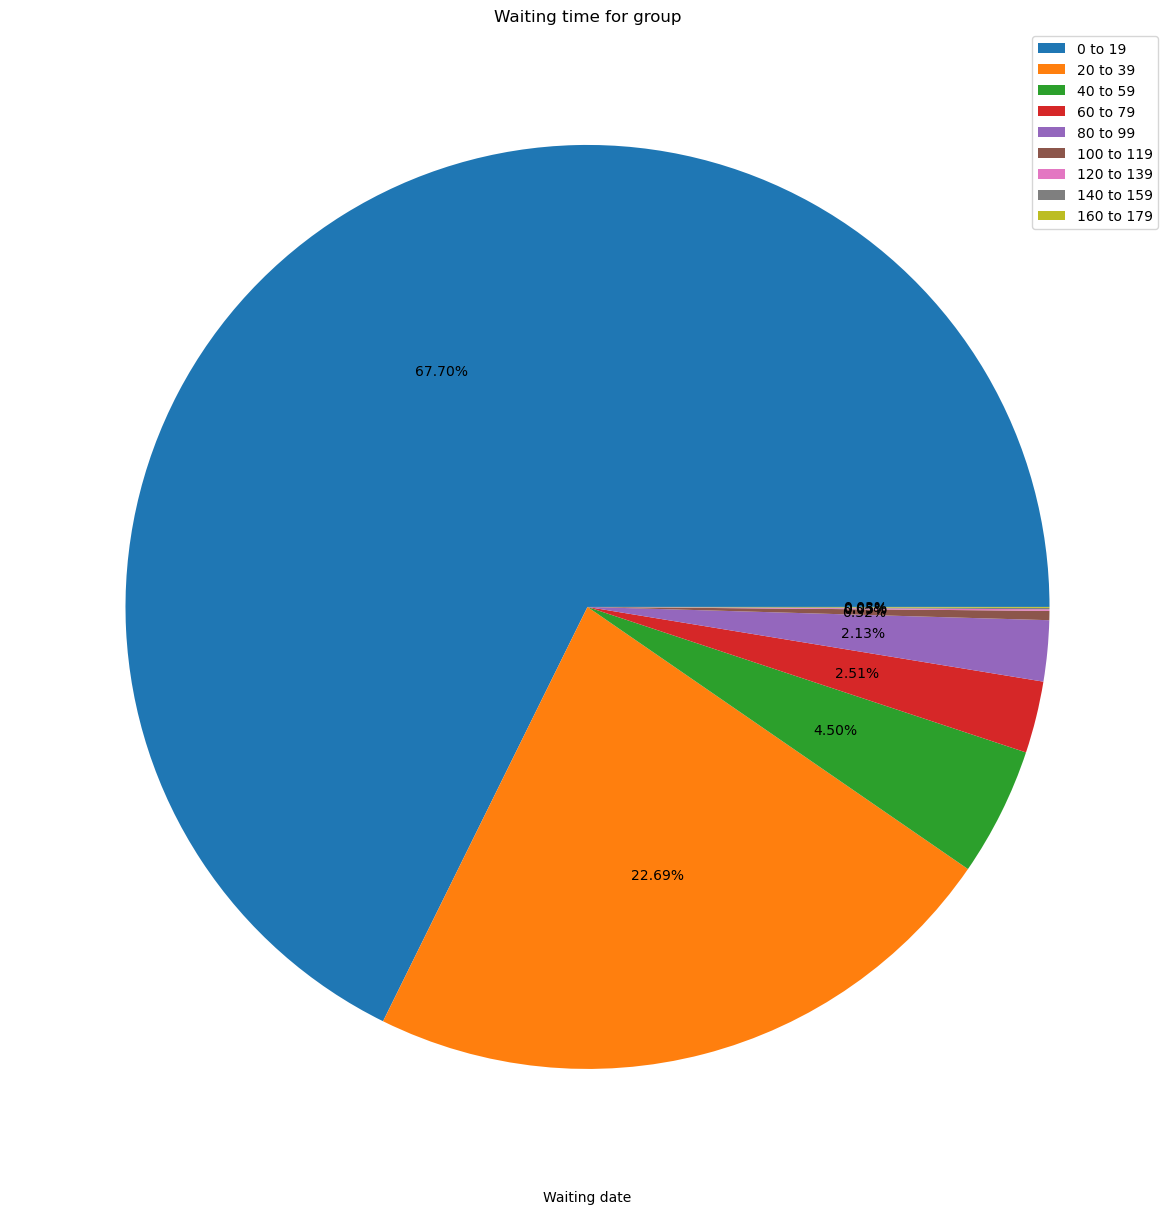

In [91]:
plt.figure(figsize=(15,15))
plt.pie(WaitingDateGroup['WaitingDateGroup'].value_counts(),autopct ="%.02f%%")
plt.title('Waiting time for group')
plt.xlabel("Waiting date")
plt.legend(["0 to 19","20 to 39","40 to 59","60 to 79","80 to 99","100 to 119","120 to 139","140 to 159","160 to 179"]);

***The chart above shows that about 67% of patients have to wait from 0 to 19 days, and 22% of patients have to wait from 20 to 39 days.***

## Conclusions
### 1. Summarize the results
#### 1.1. Does age affect participation rate?
*The older we are, the lower the absenteeism.*
#### 1.2. What is the ratio of participants?
*The present rate is higher than the absent rate. About 20% of patients are absent*
#### 1.3. Does gender affect participation?
*The participation rate of women is higher than that of men.*
#### 1.4. Does neighborhood influence participation?
*The 4 neighborhoods(JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA) with the largest participants have the best attendance percentage*
#### 1.5. Percentage of patients admitted as no-shows by number of waiting days? 
*The chart above shows that about 67% of patients have to wait from 0 to 19 days, and 22% of patients have to wait from 20 to 39 days.*
# => There is an impact on patient absence, but the results are not highly accurate, it is necessary to provide some additional information to the data set. #
### 2. The limitations
It is necessary to provide more information about each patient's income level and medical history to increase the level of assessment more accurately.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [92]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 787159 bytes to Investigate_a_Dataset.html
